

# Investigate TMVB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset comes from Udacity Data Analyst Nano Degree, originally from the kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains 10866 rows and 21 columns.

> We interest to learn more about
>
>1. Which genres are most popular from year to year? 
>2. What kinds of properties are associated with movies that have high revenues?
>3. What are the top 10 most profitable movies?
>4. Which director produce most movies?



<a id='wrangling'></a>
## Data Wrangling

> In this section, we will explore, inspect, and clean the data.


In [1]:
#loading the package and import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head()


(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
#create new column ---- calculate net profit for each movie 
df['net_profit'] = df['revenue'] - df['budget']


### Handle Missing Data

In [3]:
# inspect the missing data in %
x = df.isna().sum()*100/len(df)
x

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
net_profit               0.000000
dtype: float64

In [4]:
# Drop columns that won't be used in our analysis
df.drop(columns = ['tagline','homepage', 'cast', 'production_companies', 'keywords'], inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [5]:
# Drop the missing value at genres columns
df.dropna(how='any', subset=['genres'], inplace=True)
# Double confirm
df.isna().sum()*100/len(df)

id                0.000000
imdb_id           0.073780
popularity        0.000000
budget            0.000000
revenue           0.000000
original_title    0.000000
director          0.387347
overview          0.027668
runtime           0.000000
genres            0.000000
release_date      0.000000
vote_count        0.000000
vote_average      0.000000
release_year      0.000000
budget_adj        0.000000
revenue_adj       0.000000
net_profit        0.000000
dtype: float64

In [6]:
# No duplicated row
df.duplicated().sum()

1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07,2.525107e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08,9.668340e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07,9.161953e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [8]:
# count the budget columns have value less than 0
# There are 5674 columns less than 0 in budget columns, if needed, we will create different data frame to answer the questions
(df['budget'] <= 0).sum()

5674

### More than half of the records in the budget has missing, this will reduce our result accuracy when exploring the relationship between budget, revenue, and net profit. We will exclude them during the analysis when we need to use the budget information.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   imdb_id         10835 non-null  object 
 2   popularity      10843 non-null  float64
 3   budget          10843 non-null  int64  
 4   revenue         10843 non-null  int64  
 5   original_title  10843 non-null  object 
 6   director        10801 non-null  object 
 7   overview        10840 non-null  object 
 8   runtime         10843 non-null  int64  
 9   genres          10843 non-null  object 
 10  release_date    10843 non-null  object 
 11  vote_count      10843 non-null  int64  
 12  vote_average    10843 non-null  float64
 13  release_year    10843 non-null  int64  
 14  budget_adj      10843 non-null  float64
 15  revenue_adj     10843 non-null  float64
 16  net_profit      10843 non-null  int64  
dtypes: float64(4), int64(7), object

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 Which genres are most popular from year to year?
> We notice the genres columns have more than 1 genre, we need to consider all the genres to find out the most popular genres. if we just choose one genre from each movie, our analysis would be biased.

> Here, we will use all the genre of each movie for our analysis.

In [10]:
# copy a new dataframe 
df1 = df.copy()
#convert genres datatype to string
df1.genres = df1.genres.astype('str')

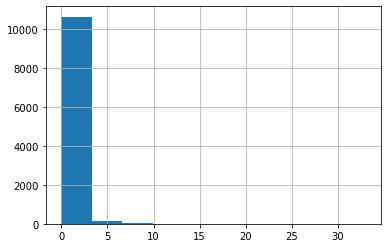

In [11]:
# take a look popularity distribution
# the major popularity fall below 1
df.popularity.hist();



In [12]:
df['popularity'].describe()

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

In [13]:
# split the genres string
df1.genres = df1.genres.str.split('|')
df1.head(n=15)

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,"[Western, Drama, Adventure, Thriller]",12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,"[Science Fiction, Action, Thriller, Adventure]",6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,"[Drama, Adventure, Science Fiction]",9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,"[Family, Animation, Adventure, Comedy]",6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,"[Comedy, Animation, Family]",6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609


From the histogram and the summary of statistics. We can see the movie have popularity greater than 1 are considered popular.

Let explore further. 
As I mention before, we notice the genres columns have more than 1 genre. For example, Jurassic World has 5 genres which are action, adventure, science, fiction, and thriller. It also has the highest popularity which is 32.98.

To tidy up the data, we will split the genre columns, create each row for each genre and perform the calculation.

In [14]:
# create genre list( create each row for each gen) using explode 
df1 = df1.explode('genres')
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
count,26960.000000,26960.000000,2.696000e+04,2.696000e+04,26960.000000,26960.000000,26960.000000,26960.000000,2.696000e+04,2.696000e+04,2.696000e+04
mean,58677.837240,0.706091,1.751013e+07,4.743503e+07,102.798405,249.973813,5.956358,2000.700148,2.104112e+07,6.087875e+07,2.992490e+07
std,86713.364877,1.114877,3.460614e+07,1.321993e+08,30.370853,637.964080,0.911935,12.763823,3.819696e+07,1.615175e+08,1.095467e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10200.750000,0.224628,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18214.000000,0.411416,1.130000e+02,0.000000e+00,99.000000,44.000000,6.000000,2005.000000,2.248029e+02,0.000000e+00,0.000000e+00
75%,58235.750000,0.774737,2.000000e+07,3.053601e+07,112.000000,173.000000,6.600000,2011.000000,2.704173e+07,4.375761e+07,1.338165e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [15]:
# calculation -------popularity of each genres for each years
genres_count = df1.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
genres_count.head()

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305


In [16]:
# group the dataframe again to find the most popular genre of each year 
x = genres_count.groupby('release_year').agg({'popularity':'max'})
x.head()


,popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,0.930959


In [17]:
# combine two dataframe into one 
new = genres_count.merge(x, how='inner', right_on='popularity', left_on='popularity')
new.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


In [18]:
# alternative, we also can use the groupby method 
# groupby year again and get the largest value
alt = df1.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

In [19]:
# tidy up the data by removing extra row index by reset index
data = alt.reset_index(level=0, drop=True)
# change the pandas series to pandas dataframe
data = data.reset_index()
data.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


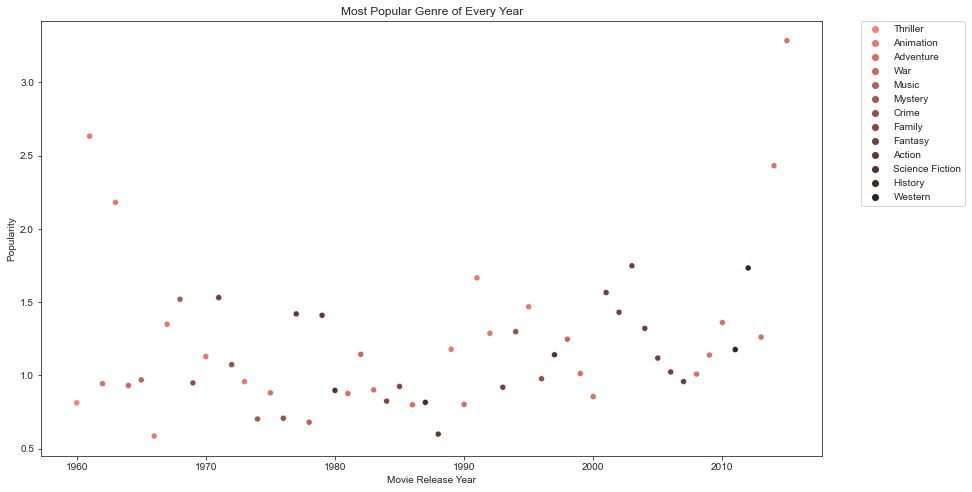

In [20]:
# set chart dimension
plt.figure(figsize=(14,8))

# set plotting style
sns.set_style('ticks') 

# set title
plt.title('Most Popular Genre of Every Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Popularity')

#draw scatter plot 
sns.scatterplot(x="release_year", y="popularity", hue="genres", palette='dark:salmon_r', data=new)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


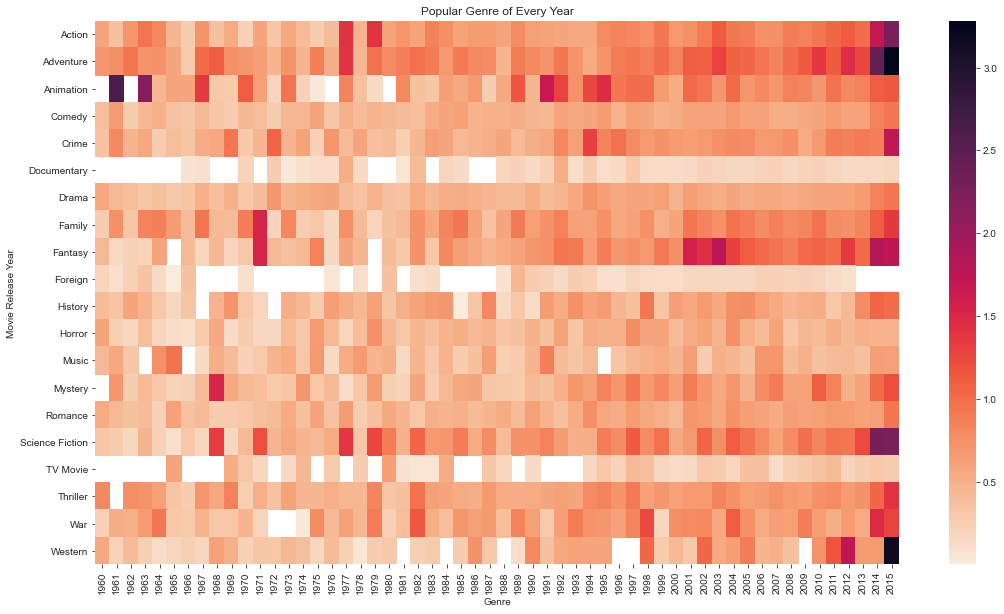

In [21]:
# set chart dimension
plt.figure(figsize=(18,10))
# heatmap plot 
sns.heatmap(df1.groupby(['release_year','genres'])['popularity'].mean().unstack('release_year'), cmap="rocket_r")

# set title
plt.title('Popular Genre of Every Year')
plt.xlabel('Genre')
plt.ylabel('Movie Release Year');

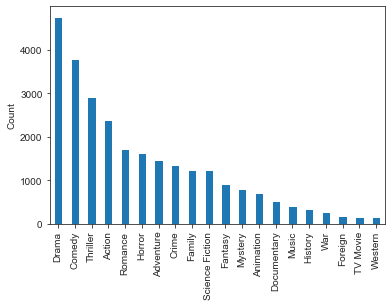

In [22]:
# Popular of genres summary during 1960 to 2015 period
# Most popular genres over the years is Adventure, follow by Animation and Fantasy
df1.genres.value_counts().plot(kind='bar').set_ylabel('Count');

In [23]:
df1.genres.value_counts().sort_values(ascending=False)[:5]

Drama       4761
Comedy      3793
Thriller    2908
Action      2385
Romance     1712
Name: genres, dtype: int64

### *There is no significant trend of which genre constantly dominating over the year. The most popular genre during 1960 to 2015 period is Drama, follow by Comedy and Thriller.*

## Question 2 : What kinds of properties are associated with movies that have high revenues?

In [24]:
#we know budget can't be less than 0, so filter out the dataframe
rev = df1[df1['budget'] > 0]

In [34]:
# calculate the correlation
rev.corr()

,budget,revenue,net_profit,popularity
budget,1.000000,0.989509,0.972983,0.571577
revenue,0.989509,1.000000,0.996130,0.634417
net_profit,0.972983,0.996130,1.000000,0.666141
popularity,0.571577,0.634417,0.666141,1.000000


In [26]:
# group the genre 
rev = rev.groupby('genres', as_index =False).agg({'budget':'sum','revenue':'sum','net_profit':'sum','popularity':'mean'})
rev.head()

,genres,budget,revenue,net_profit,popularity
0,Action,66133123670,169887182114,103754058444,1.297766
1,Adventure,55226774655,163500596287,108273821632,1.621153
2,Animation,16188687343,51681421541,35492734198,1.455120
3,Comedy,50438993940,132183056333,81744062393,0.882567
4,Crime,23946786723,54778120159,30831333436,0.987179


In [27]:
# sort by highest revenue
rev = rev.sort_values(by='revenue', ascending=False)

#convert revenue in 1 billion unit
rev['revenue'] =rev['revenue']/1000000000

# convert net profit in 1 billion unit
rev['net_profit'] =rev['net_profit']/1000000000

# convert budget in 1 billion unit
rev['budget'] =rev['budget']/1000000000

rev

,genres,budget,revenue,net_profit,popularity
0,Action,66.133124,169.887182,103.754058,1.297766
1,Adventure,55.226775,163.500596,108.273822,1.621153
3,Comedy,50.438994,132.183056,81.744062,0.882567
6,Drama,56.582217,130.519646,73.937429,0.859479
17,Thriller,50.052766,117.680484,67.627718,1.035646
8,Fantasy,29.873128,86.420717,56.547589,1.469079
7,Family,28.755344,86.340257,57.584913,1.269229
15,Science Fiction,30.721424,85.082260,54.360835,1.500336
14,Romance,21.453537,57.193921,35.740384,0.842563
4,Crime,23.946787,54.778120,30.831333,0.987179


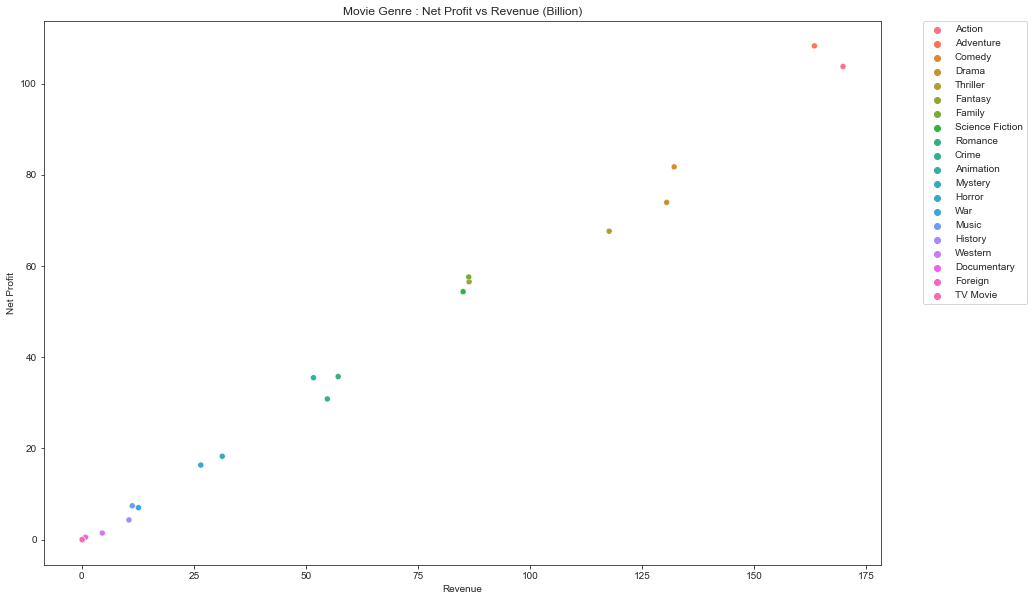

In [28]:
# set chart dimension
plt.figure(figsize=(15,10))

# set plotting style
sns.set_style('ticks') 

# set title
plt.title('Movie Genre : Net Profit vs Revenue (Billion)')
plt.xlabel('Revenue')
plt.ylabel('Net Profit')

#draw scatter plot
sns.scatterplot(x="revenue", y="net_profit", hue="genres", data=rev);

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Strong positive correlation, 0.989509 between revenue and net profit.

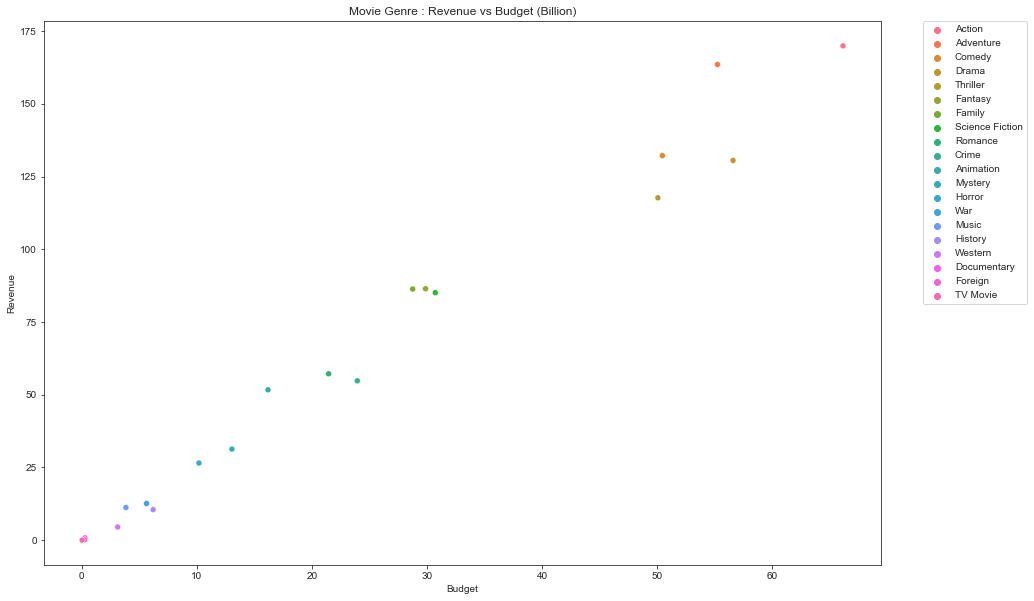

In [29]:
# set chart dimension
plt.figure(figsize=(15,10))

# set plotting style
sns.set_style('ticks') 

# set title
plt.title('Movie Genre : Revenue vs Budget (Billion)')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# draw scatter plot
sns.scatterplot(x="budget", y="revenue", hue="genres", data=rev);

# move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Strong positive correlation, 0.996130 between revenue and budget.

### *It indicates that movies genres have higher revenue associated with a higher budget and higher net profits.*

## Question 3: What is the top 10 most profitable movies?

In [30]:
profit = df.groupby(['original_title', 'popularity','genres', 'release_year', 'revenue','budget'])['net_profit'].sum()
profit = profit.reset_index().sort_values(by='net_profit', ascending=False)

# calculate return in investment - ROI
profit['ROI'] = profit['net_profit']/profit['budget']
profit[:9]


,original_title,popularity,genres,release_year,revenue,budget,net_profit,ROI
835,Avatar,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,2781505847,237000000,2544505847,10.736312
7555,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,2068178225,200000000,1868178225,9.340891
9975,Titanic,4.355219,Drama|Romance|Thriller,1997,1845034188,200000000,1645034188,8.225171
4543,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,1513528810,150000000,1363528810,9.090192
3293,Furious 7,9.335014,Action|Crime|Thriller,2015,1506249360,190000000,1316249360,6.927628
8040,The Avengers,7.637767,Science Fiction|Action|Adventure,2012,1519557910,220000000,1299557910,5.907081
3692,Harry Potter and the Deathly Hallows: Part 2,5.711315,Adventure|Family|Fantasy,2011,1327817822,125000000,1202817822,9.622543
837,Avengers: Age of Ultron,5.944927,Action|Adventure|Science Fiction,2015,1405035767,280000000,1125035767,4.017985
3274,Frozen,6.112766,Animation|Adventure|Family,2013,1274219009,150000000,1124219009,7.494793


In [31]:
# top 10 movies with highest revenues
revenue = profit.sort_values(by='revenue', ascending=False)
revenue[:9]

,original_title,popularity,genres,release_year,revenue,budget,net_profit,ROI
835,Avatar,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,2781505847,237000000,2544505847,10.736312
7555,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,2068178225,200000000,1868178225,9.340891
9975,Titanic,4.355219,Drama|Romance|Thriller,1997,1845034188,200000000,1645034188,8.225171
8040,The Avengers,7.637767,Science Fiction|Action|Adventure,2012,1519557910,220000000,1299557910,5.907081
4543,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,1513528810,150000000,1363528810,9.090192
3293,Furious 7,9.335014,Action|Crime|Thriller,2015,1506249360,190000000,1316249360,6.927628
837,Avengers: Age of Ultron,5.944927,Action|Adventure|Science Fiction,2015,1405035767,280000000,1125035767,4.017985
3692,Harry Potter and the Deathly Hallows: Part 2,5.711315,Adventure|Family|Fantasy,2011,1327817822,125000000,1202817822,9.622543
3274,Frozen,6.112766,Animation|Adventure|Family,2013,1274219009,150000000,1124219009,7.494793


## We can see the top 10 profitable movies associated with higher popularity have a minimum return of investment of 400% and up to 1073%. The return on investment is quite attractive.


### Question 4:  Which director produces the most movies?

In [32]:
df['director'].value_counts().head(n=10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

###  Woody Allen produces the highest number of movies, which is 43.

<a id='conclusions'></a>


# The data limitations of this dataset:
1. Almost every movie has multiple genres, and we have included all the genres during our calculation. 
2. Lack of details on how the vote_count and vote_average calculation.
3. There are **5674** columns less than 0 in budget columns.
4. Do take note I use different data frame to answer different questions. I create a new data frame to answer Q1 & Q2. The remaining questions are used the original data frame.
5. The missing values in the data will affect our accuracy of analysis, if further investigation is needed, we can perform a statistical test to determine our result whether is statistically significant. The statistical test can help us determine whether our results in data are not determined by chance alone.


# Conclusions

For our analysis, we found that the movie genres with higher revenues come with higher popularity, higher budget, and higher net profit. We found the same findings when we look at the individual movies with higher revenues. We can conclude that production films are willing to invest more money in popular movies genres. Based on the data, the higher budget will allow firms to produce high-quality movies which generate higher revenue and net profit. As we can see from the top 10 most profitable movies, the return on investments is 4 times to 10.73 times on their budget.  




